In [2]:
# Importing
import theano.tensor as T
import theano
import sys, os
sys.path.append("../../gempy")

# Importing GeMpy modules
import gempy

# Reloading (only for development purposes)
import importlib
importlib.reload(gempy)

# Usuful packages
import numpy as np
import pandas as pn

import matplotlib.pyplot as plt

# This was to choose the gpu
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Default options of printin
np.set_printoptions(precision = 6, linewidth= 130, suppress =  True)

#%matplotlib inline
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [16]:
geo_data = gempy.create_data([0, 10, 0, 10, -10, 0], [50, 50, 50],
                             path_o="GeoModeller/test_e/test_e_Foliations.csv",
                             path_i="GeoModeller/test_e/test_e_Points.csv")

gempy.set_series(geo_data, {'series': ('A', 'B'),
                                'fault1': 'f1'}, order_series=['fault1', 'series'], order_formations=['f1','A','B'],
                 verbose=0)

interp_data = gempy.InterpolatorData(geo_data)

# # Updating the interp data which has theano compiled
# interp_data.update_interpolator(geo_data)

# Compute model
sol = gempy.compute_model(interp_data, u_grade=[1, 1])

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float32


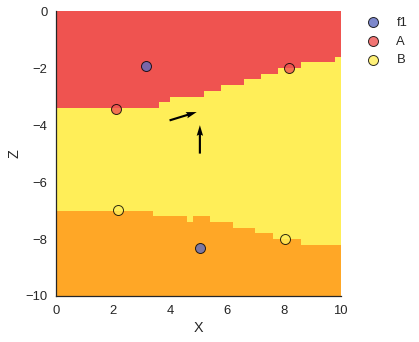

In [17]:
gempy.plot_section(geo_data, sol[0][0, :], 25, direction='y', plot_data=True)

In [11]:
# Load model
real_sol = np.load('test_e_sol.npy')

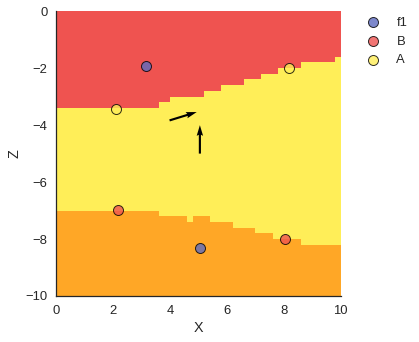

In [12]:
gempy.plot_section(geo_data, real_sol[0][0, :], 25, direction='y', plot_data=True)

In [1]:
if False:
    np.save(os.path.dirname(__file__)+'/test_e_sol.npy', sol)

gempy.plot_section(geo_data, sol[0][0, :], 25, direction='y', plot_data=True)
plt.savefig(os.path.dirname(__file__)+'/figs/test_e.png', dpi=200)

# Load model
real_sol = np.load(os.path.dirname(__file__)+'/test_e_sol.npy')

# We only compare the block because the absolute pot field I changed it
np.testing.assert_array_almost_equal(sol[0][0, :], real_sol[0][0, :], decimal=3)

NameError: name 'gempy' is not defined